## Plain CNN model
### Haichao Wang, Tommy Kaplan

In [4]:
import Python_internal_functions as ulyses

import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers


image = ulyses.load_pickle("/scratcha/nrlab/wang04/urine/delfi/down_sample/bams/0.1x/SLX-19387_D710tp_D502tp.mrkdup.BL.filtered.bam.markduplicates.bam.downsamp_0.1x.mrkdup.bam.summary_long.csv.tensor")

In [6]:
image5 = image[50]

In [9]:
image5_n_isize = image5[:, :, 0]

In [13]:
std_vec = np.std(image5_n_isize, axis=0)

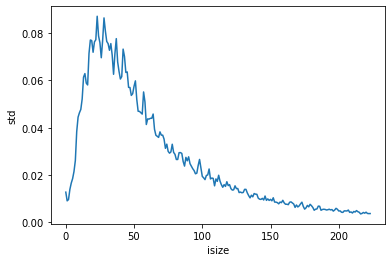

In [18]:
# Import Library

import matplotlib.pyplot as plt

# Plot

#plt.plot(std_vec.transpose())
plt.plot(std_vec)

# Labelling 

plt.xlabel("isize")
plt.ylabel("std")

# Display

plt.show()

In [ ]:

# Model / data parameters
num_classes =  2
input_shape = (490, 221, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)


# build the model

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(3, 2)),
        
        layers.Conv2(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# train the model

batch_size = 15 
epochs = 30 

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["AUC"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


# evaluate the trained model

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



